# Analyse ROMY Events

In [1]:
from sixdegrees import sixdegrees

## Configurations

In [2]:
config = {
    # Required time window parameters
    'tbeg': "2024-12-05 18:34:21",  # Start time
    'tend': "2024-12-05 21:34:21",  # End time

    # event
    'origin_time': "2024-12-05 18:44:26",
    'magnitude': 7.0,

    # SEED identifiers
    'seed': "XX.RLAS..",     # seed ID of output stream
    'rot_seed': ["BW.RLAS..BJZ"], # Rotation sensor seed ID
    'tra_seed': ["GR.WET..BHZ", "GR.WET..BHN", "GR.WET..BHE"],  # Translation sensor seed ID
    
    # rotate to ZNE
    'rotate_to_zne': False,

    # Data source
    'data_source': "fdsn",  # "fdsn" | "sds" | "mseed_file"
    'fdsn_client_rot': "LMU",  # "IRIS",
    'fdsn_client_tra': "BGR",  # "IRIS",

    # Path configurations
    'workdir': "./",            # Working directory
    'path_to_data_out': "./output/",  # Output directory

    # Project information
    'project': "G_Analysis",  # Project name
    
    # Backazimuth calculation parameters
    'baz_step': 1,               # Step size for backazimuth search in degrees
    'time_win_sec': 30,          # Window length in seconds
    'time_win_sec_overlap': 15,  # Window overlap in seconds
    
    # Optional parameters
    'verbose': True,            # Print detailed information
}

Setup a sixdegrees object

In [3]:
sd = sixdegrees(conf=config)

Store the configuration as a pickle file

In [4]:
# sd.store_as_pickle(config, "./event_configs/"+f"M{str(config['magnitude']).replace('.','')}_{config['tbeg'][:10].replace('-','')}")

This will load the data from the data source:
- local mseed file
- local sds system
- fdsn (online)

and trim it to the time window

In [5]:
sd.load_data(config['tbeg'], config['tend'])

3 Trace(s) in Stream:
GR.WET..BHZ | 2024-12-05T18:34:20.019999Z - 2024-12-05T21:34:22.019999Z | 20.0 Hz, 216041 samples
GR.WET..BHN | 2024-12-05T18:34:20.019999Z - 2024-12-05T21:34:22.019999Z | 20.0 Hz, 216041 samples
GR.WET..BHE | 2024-12-05T18:34:20.020000Z - 2024-12-05T21:34:22.020000Z | 20.0 Hz, 216041 samples
 -> removing response failed!
No matching response information found.
 -> removing sensitivity failed!
'sixdegrees' object has no attribute 'rotate_zn'
1 Trace(s) in Stream:
BW.RLAS..BJZ | 2024-12-05T18:34:19.981750Z - 2024-12-05T21:34:21.981750Z | 20.0 Hz, 216041 samples


Get key information about the event

In [6]:
ev = sd.get_event_info(origin_time=config['origin_time'],
                       base_catalog="USGS",
                       magnitude=config['magnitude'])

Found event:
Origin time: 2024-12-05T18:44:21.110000Z
Magnitude: 7.0 mw
Location: 40.374°N, -125.022°E
Depth: 10.0 km
Distance: 83.3°
Backazimuth: 329.1°


Ensure that all traces of stream have the same sample size

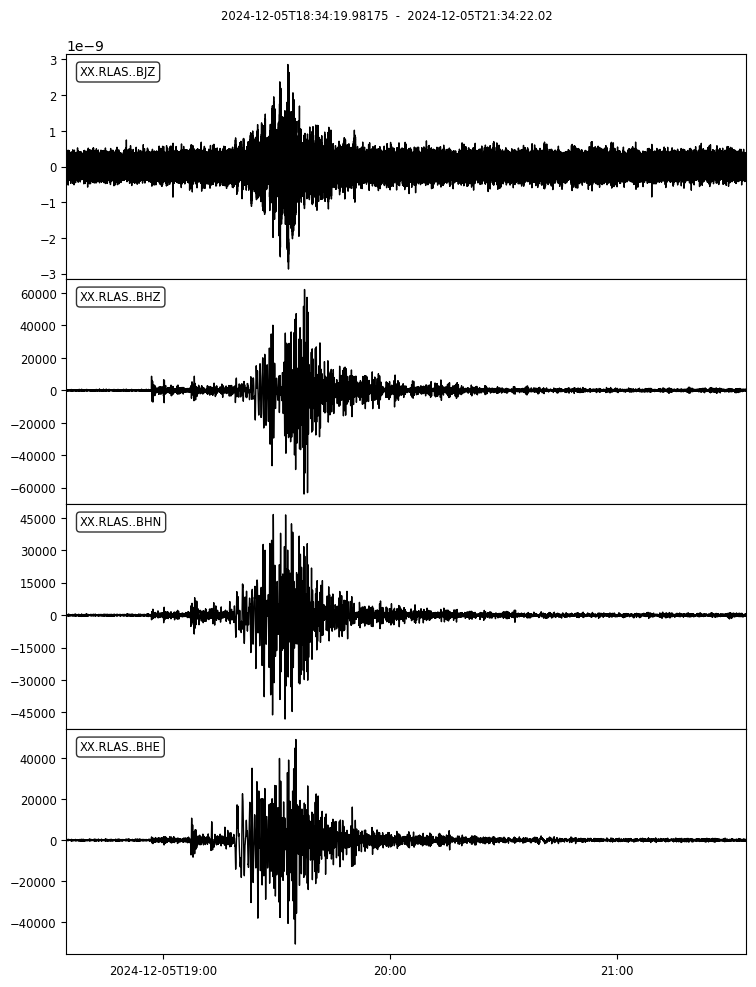

In [7]:
sd.st.plot(equal_scale=False);

In [8]:
sd.trim_stream(set_common=True, set_interpolate=False)

### Write data to file or SDS system

In [9]:
# write to mseed file
sd.st.write(f"./data/romy_eventM{config['magnitude']}.mseed", format="MSEED")

# write to sds filesystem
# sd.write_to_sds(sd.st, "./data/", format="MSEED")

/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
